In [2]:
library(qiime2R)
library("ggpicrust2")
library(readr)
library(tibble)
library(tidyverse)
library(ggprism)
library(patchwork)
library(ggplot2)
library(microbiome)
library(phyloseq)
library(microViz)
library(biomformat);packageVersion("biomformat")
library(readr)
library(Maaslin2)
library(ggpubr)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tidyr     1.3.1
✔ lubridate 1.9.3     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


Th

[1] ‘1.30.0’


Attaching package: ‘ggpubr’


The following object is masked from ‘package:microViz’:

    stat_chull


The following object is masked from ‘package:qiime2R’:

    mean_sd




In [3]:
#read metadata file and set factor order
meta = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv",
               header=TRUE, row.names=1)
meta$Site_Num <- as.integer(meta$Site_Num)
meta$Site.Status <- factor(meta$Site.Status, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
head(meta, n=2)
dim(meta)

,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
518.H,518.H_S18,518.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,OFAV,Healthy,⋯,0,1,0,0,0,0,0,0,0,0
519.H,519.H_S18,519.H_S18,Site-G,Xesto.Patch,Lower Keys,SWG,cor,Coral,OFAV,Healthy,⋯,0,1,0,0,0,0,0,0,0,0


[1] 360  32

In [4]:
#read ASV table
ASV_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza")
ASV_table <- ASV_qza$data
head(ASV_table, n=2)
dim(ASV_table)

,R1.1.W,R1.10.W,R1.11.W,R1.12.W,R1.13.W,R1.14.W,R1.15.W,R1.16.W,R1.17.W,R1.18.W,⋯,GR.SINT.En4,GR.SINT.En5,GR.SINT.En6,TP.DLAB.En1,TP.DLAB.En2,TP.DLAB.En3,TP.DLAB.En4,TP.DLAB.En5,TP.DLAB.En6,TP.DSTO.En1
72caa013fe7649c65ffe72138ff7dfd1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2b248f10cca3c82a2640506132f9c869,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 11756  1109

In [5]:
taxa_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza")
taxa_table <- taxa_qza$data
taxa_table <- taxa_qza$data %>%
as_tibble() %>% 
#select(-Confidence) %>% 
separate(Taxon, sep=";", c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>%
arrange(Feature.ID) %>%
mutate(ASVs =paste('ASV',1:n(), sep = "_")) %>%
column_to_rownames("Feature.ID")%>%
as.matrix()

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 103262 rows [1, 2, 3, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 26, 27, ...].”


In [6]:
ps = phyloseq(otu_table(ASV_table, taxa_are_rows=TRUE), 
               sample_data(meta),
tax_table(taxa_table))
ps %>% tax_fix()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 360 samples ]
sample_data() Sample Data:       [ 360 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

In [7]:
ps_AH <- subset_samples(ps, Sample.Type=="Healthy")

In [8]:
ps_AH_fill = filter_taxa(ps_AH, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_AH_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 915 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 915 taxa by 9 taxonomic ranks ]

In [9]:
# Subset samples for Sediment type
ps_Sediment <- subset_samples(ps, subset = sample_data(ps)$Type == "Sediment")

ps_fill_s = filter_taxa(ps_Sediment, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_s

ps_Water <- subset_samples(ps, subset = sample_data(ps)$Type == "Water")

ps_fill_w = filter_taxa(ps_Water, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_w


meta_fill_s <- as(sample_data(ps_fill_s), "data.frame") 


meta_fill_w <- as(sample_data(ps_fill_w), "data.frame") 

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4389 taxa and 90 samples ]
sample_data() Sample Data:       [ 90 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 4389 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 940 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 940 taxa by 9 taxonomic ranks ]

In [10]:
otu<-as(otu_table(ps_AH_fill),"matrix")
otu_biom<-make_biom(data=otu)
#write_biom(otu_biom,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/ps_AH_fill_table.biom")
otu_sed<-as(otu_table(ps_fill_s),"matrix")
otu_sed_biom<-make_biom(data=otu_sed)
#write_biom(otu_sed_biom,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/ps_sed_fill_table.biom")

otu_wat<-as(otu_table(ps_fill_w),"matrix")
otu_wat_biom<-make_biom(data=otu_wat)
#write_biom(otu_wat_biom,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/ps_wat_fill_table.biom")

In [11]:
#ran on linux server 
#picrust2_pipeline.py -s dna-sequences.fasta -i ps_AH_fill_table.biom -o picrust2_AH_fill_pipline -p 25
#add_descriptions.py -i pathways_out/path_abun_unstrat.tsv.gz -m METACYC -o pathways_out/path_abun_unstrat_descrip.tsv.gz

In [12]:
table_fill <- otu_table(t(ps_AH_fill)) %>%
as.data.frame()
dim(table_fill)
head(table_fill)
meta_fill <- as(sample_data(ps_AH_fill), "data.frame") #%>%
#select("Site.Status", "samp", "Species_sample", "Site.Name", "Date", "Type")
dim(meta_fill)
head(meta_fill)
#write_delim(meta_fill,"/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_AH_fill.txt",
 #            delim = "\t")



[1] 117 915

,4af34e31f4f29f5372246db273985eb8,3da2ced63ab908b7a3be96b147e3004a,f71e8be5ffefd9c56af594b2a42ea17c,6d5a010f72f3f1199973aaa7ec9c4164,f5d7ec18156c74db93a21bd1261e8f78,4585df1e50203920024dd9be21f59bee,8142d72fba413c027a2274cd08385427,572f06c3cc65f3e95ef57f05acfea074,72afc9a76e86ea398c2fa3cf88692d5a,168e60bb8b9ed33dad140c574171e8dc,⋯,dfaf458ae310d6c4203e6b6d039265d0,abd5f1fa8719656e2a17b7a190d75593,8ad23b91445141f434416d07d2b1dc42,2ac0e6fa85039f2f0ead04c6d2f09887,453d7372eebb15b369aba6493f4e9173,0e2e91fba1ca9ed7de2d11ea4786c914,7ff06598e9fd07d55722b20b137d9078,c31a1c07a147e95339be9f03130553a9,0f990cf2a8b22a105f2c439e9b7576c1,8e844cd3303efc5bbb4917b26c106900
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R3S7A1,47,0,0,0,0,18,0,0,36,0,⋯,0,48,61,0,0,0,10,0,4,0
R3S7A2,21,0,0,0,4,0,0,5,0,0,⋯,0,26,33,0,58,0,0,0,0,0
R3S7A3,120,0,5,0,0,0,0,53,88,0,⋯,7,29,78,0,48,0,84,0,0,18
R3S7A4,0,0,0,0,4,0,0,0,0,0,⋯,0,59,0,0,0,0,6,0,0,0
R3S7A5,101,0,0,0,0,0,17,15,0,5,⋯,0,62,0,0,60,0,19,0,0,0
R3S7C1,133,0,0,0,0,0,15,0,63,0,⋯,0,26,76,0,100,0,20,0,4,0


[1] 117  32

,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R3S7A1,R3S7A1_S11,R3S7A1_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A2,R3S7A2_S11,R3S7A2_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A3,R3S7A3_S11,R3S7A3_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A4,R3S7A4_S11,R3S7A4_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A5,R3S7A5_S11,R3S7A5_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,⋯,0,1,0,0,0,0,0,0,0,0
R3S7C1,R3S7C1_S12,R3S7C1_S12,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,SINT,Healthy,⋯,0,1,0,0,0,0,0,0,0,0


In [13]:
#meta_fill <-
 # read_delim(
  #  "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_AH_fill.txt",
   # delim = "\t",
    #escape_double = FALSE,
    #trim_ws = TRUE
  #) 

#head(meta_fill)

In [14]:
#on excel removed "," and ";"
KO_AH= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_AH_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)
head(KO_AH)
dim(KO_AH)


KO_wat= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_wat_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)
head(KO_wat)
dim(KO_wat)


KO_sed= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_sed_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)
head(KO_sed)
dim(KO_sed)

,R3S7A1,R3S7A2,R3S7A3,R3S7A4,R3S7A5,R3S7C1,R3S7C2,R3S7C3,R3S7C4,R3S7C5,⋯,CG.DSTO3.H,CG.DSTO4.H,CG.DSTO5.H,CG.DSTO6.H,CG.SINT1.H,CG.SINT2.H,CG.SINT3.H,CG.SINT4.H,CG.SINT5.H,CG.SINT6.H
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
K00001,6882.10,2772.80,8899.70,4973.00,9706.00,18418.90,16852.10,21015.45,16956.65,14520.20,⋯,29022.70,13925.8,86152.35,14614.70,56666.35,56509.10,23756.30,19837.50,33379.90,50990.00
K00002,291.50,349.00,293.50,628.50,881.50,308.00,258.00,2202.50,242.50,233.50,⋯,14859.00,7783.0,6220.00,7378.00,5010.50,6195.00,3051.00,1973.00,8360.00,5786.50
K00003,8579.67,4029.23,13423.10,7658.17,13992.36,22079.62,23972.46,30809.98,23856.71,23261.09,⋯,53773.37,30488.3,139886.42,30375.77,92836.85,93889.28,40735.49,31402.96,82389.64,97448.49
K00004,58.00,24.00,121.00,12.00,141.00,183.00,256.00,68.00,184.00,290.00,⋯,56.00,83.0,1051.00,85.00,390.00,243.00,16.00,14.00,84.00,229.00
K00005,732.00,359.00,293.50,751.00,1309.50,322.30,540.50,2748.75,250.30,383.75,⋯,21495.50,13627.0,16045.05,12067.80,10133.60,10853.15,5811.70,3307.20,13949.25,18564.30
K00008,1367.07,1120.43,2955.07,2135.00,4234.86,5752.22,6435.86,2439.86,3670.64,4499.64,⋯,7611.00,5748.0,39360.57,5417.57,11975.50,5367.43,2835.36,1734.71,4931.07,9780.07


[1] 6211  117

,R3.1.W,R3.10.W,R3.11.W,R3.12.W,R3.13.W,R3.14.W,R3.15.W,R3.16.W,R3.17.W,R3.18.W,⋯,XP.En9.W,CG.En11.W,CG.En12.W,CG.En2.W,CG.En3.W,CG.En4.W,CG.En5.W,CG.En7.W,CG.En8.W,CG.En9.W
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
K00001,40557.8,55813.20,48358.3,52103.00,51524.40,52121.1,54379.10,53832.20,49858.20,50261.70,⋯,103495.2,207529.9,75829.5,93763.75,67265.00,121445.8,90515.9,206104.89,130360.4,68320.0
K00002,803.0,532.50,681.0,963.50,838.50,736.5,863.00,1254.50,1055.50,677.50,⋯,11546.5,18422.0,5753.5,11396.00,5060.00,6538.0,8044.0,23556.50,9256.5,6845.5
K00003,49716.3,56589.91,50996.3,55209.57,55710.33,54532.6,56103.46,56660.99,51447.95,52054.56,⋯,127510.7,253892.9,86828.0,119743.82,76354.43,134121.3,104057.9,264291.25,151170.4,80030.5
K00004,0.0,0.00,4.0,0.00,5.00,0.0,0.00,0.00,0.00,0.00,⋯,35.0,99.0,23.0,120.00,26.00,52.0,92.0,55.00,39.0,43.0
K00005,1199.5,850.00,1009.0,1288.50,1177.00,1109.5,1238.50,1745.00,1455.50,1017.00,⋯,18146.0,33517.5,10010.3,19782.90,8726.70,12013.0,13294.9,42693.50,17722.5,11781.3
K00007,74.0,172.00,218.0,145.00,222.00,171.0,188.00,206.00,149.00,157.00,⋯,30.0,31.0,18.0,14.00,12.00,0.0,12.0,38.14,19.0,10.0


[1] 6025   96

,R3.1.S,R3.10.S,R3.11.S,R3.12.S,R3.13.S,R3.14.S,R3.15.S,R3.16.S,R3.17.S,R3.18.S,⋯,XP.En1.S,XP.En10.S,XP.En12.S,XP.En2.S,XP.En3.S,XP.En5.S,XP.En6.S,XP.En7.S,XP.En8.S,XP.En9.S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
K00001,14132.00,13869.50,16577.84,17016.91,15971.25,21147.25,14796.25,16711.00,14192.27,16594.75,⋯,20136.98,18306.75,29326.84,15970.94,27075.73,25940.66,27806.91,34513.85,17409.91,29445.52
K00002,150.50,235.00,272.00,180.50,117.50,392.50,170.50,164.50,163.50,218.00,⋯,230.00,172.50,395.00,250.00,481.00,186.00,242.00,361.50,111.50,201.50
K00003,26916.72,26359.65,27575.61,28891.08,28443.79,29892.75,26451.61,32308.95,23090.61,30659.21,⋯,37181.36,34263.31,50833.01,27795.46,52256.41,51520.73,65515.99,64709.34,33690.85,58109.33
K00004,139.50,315.00,87.00,137.00,71.00,266.00,177.00,232.00,44.00,179.00,⋯,304.50,144.25,548.00,175.00,484.00,279.00,278.25,382.75,134.00,319.75
K00005,143.10,189.00,336.33,354.50,325.50,674.00,371.50,393.83,397.42,278.90,⋯,672.10,543.77,1005.14,844.03,650.72,1353.33,730.86,630.00,253.17,846.30
K00008,5966.50,5695.50,7601.50,6093.43,7682.50,7924.00,6450.00,9769.50,6459.50,9491.00,⋯,10794.00,13897.50,18140.00,7941.00,16890.00,19112.50,23939.50,21687.34,11786.50,21031.00


[1] 6331   90

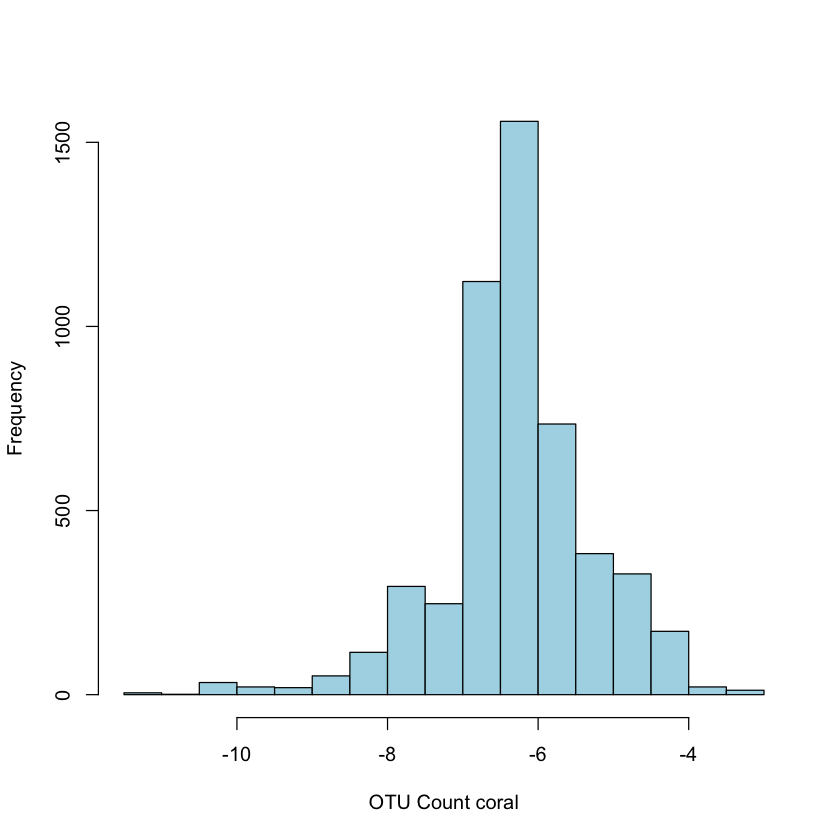

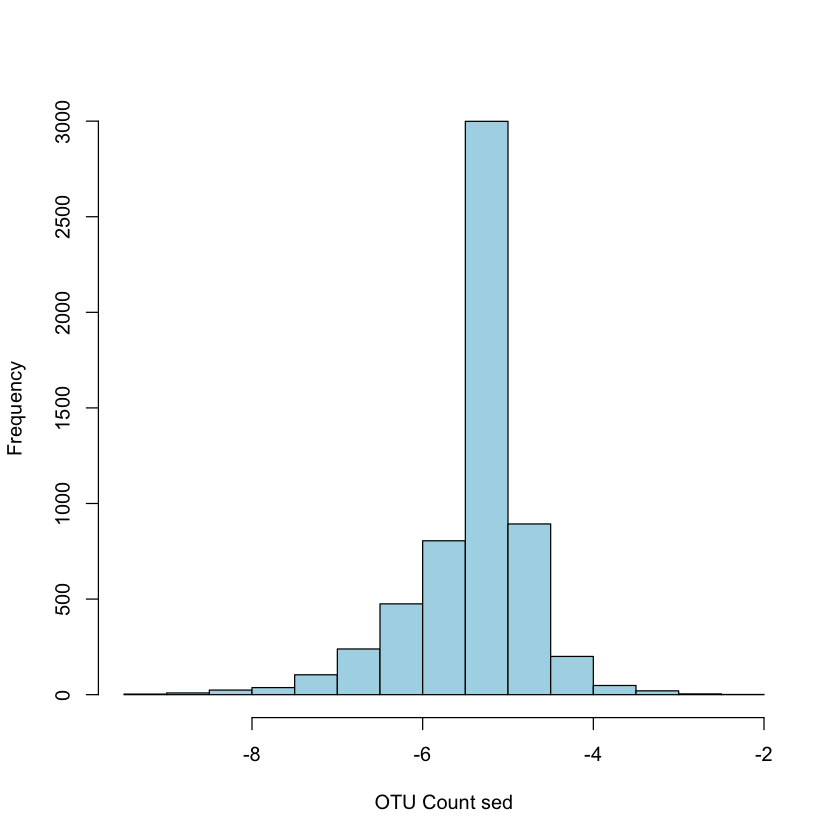

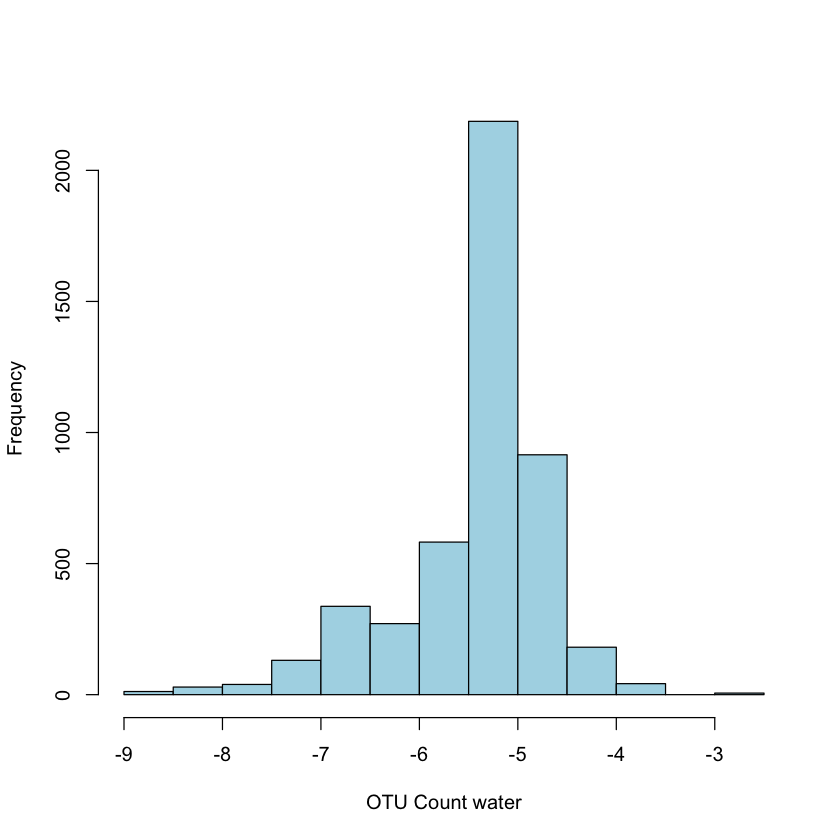

In [15]:
KO_AH_ra <- t(apply(KO_AH, 1, function(x) x/sum(x)))
hist(log(KO_AH_ra[,1]), xlab = "OTU Count coral", main = "", col = "lightblue")

KO_sed_ra <- t(apply(KO_sed, 1, function(x) x/sum(x)))
hist(log(KO_sed_ra[,1]), xlab = "OTU Count sed", main = "", col = "lightblue")                     

KO_wat_ra <- t(apply(KO_wat, 1, function(x) x/sum(x)))
 hist(log(KO_wat_ra[,1]), xlab = "OTU Count water", main = "", col = "lightblue")                                          

In [16]:
meta_fill=meta_fill %>% as.tibble() %>%
mutate_at(vars(samp), 
             ~ stringr::str_replace_all(., pattern = "_S[0-9]*", replacement = "")) %>%
#mutate_at(vars(samp), 
 #           ~ stringr::str_replace_all(., pattern = "SWG", replacement = "")) %>%
column_to_rownames("samp") 


dim(meta_fill)
head(meta_fill)

meta_fil_w=meta_fill_w %>% as.tibble() %>%
mutate_at(vars(samp), 
             ~ stringr::str_replace_all(., pattern = "_S[0-9]*", replacement = "")) %>%
#mutate_at(vars(samp), 
 #           ~ stringr::str_replace_all(., pattern = "SWG", replacement = "")) %>%
column_to_rownames("samp") 


dim(meta_fill_w)
head(meta_fill_w)



meta_fil_s=meta_fill_s %>% as.tibble() %>%
mutate_at(vars(samp), 
             ~ stringr::str_replace_all(., pattern = "_S[0-9]*", replacement = "")) %>%
#mutate_at(vars(samp), 
 #           ~ stringr::str_replace_all(., pattern = "SWG", replacement = "")) %>%
column_to_rownames("samp") 


dim(meta_fill_s)
head(meta_fill_s)

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`.”


[1] 117  31

,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,Site.Status,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R3S7A1,R3S7A1_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A2,R3S7A2_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A3,R3S7A3_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A4,R3S7A4_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A5,R3S7A5_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7C1,R3S7C1_S12,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,SINT,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0


[1] 96 32

,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R3.1.W,R3.1.W_S14,R3.1.W_S14,NA,Cliff.Green,Lower Keys,EPA1,water,Water,Water,NA,⋯,2,0,0,0,0,0,0,1,0,0
R3.10.W,R3.10.W_S14,R3.10.W_S14,NA,Cliff.Green,Lower Keys,EPA1,water,Water,Water,NA,⋯,2,0,0,0,0,0,0,1,0,0
R3.11.W,R3.11.W_S14,R3.11.W_S14,Site-G,Xesto.Patch,Lower Keys,EPA1,water,Water,Water,NA,⋯,2,0,0,0,0,0,0,1,0,0
R3.12.W,R3.12.W_S14,R3.12.W_S14,Site-G,Xesto.Patch,Lower Keys,EPA1,water,Water,Water,NA,⋯,2,0,0,0,0,0,0,1,0,0
R3.13.W,R3.13.W_S14,R3.13.W_S14,Site-G,Xesto.Patch,Lower Keys,EPA1,water,Water,Water,NA,⋯,2,0,0,0,0,0,0,1,0,0
R3.14.W,R3.14.W_S14,R3.14.W_S14,Site-G,Xesto.Patch,Lower Keys,EPA1,water,Water,Water,NA,⋯,2,0,0,0,0,0,0,1,0,0


[1] 90 32

,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R3.1.S,R3.1.S_S13,R3.1.S_S13,NA,Cliff.Green,Lower Keys,EPA1,sed,Sediment,Sediment,NA,⋯,3,0,0,0,1,0,0,0,0,0
R3.10.S,R3.10.S_S13,R3.10.S_S13,NA,Cliff.Green,Lower Keys,EPA1,sed,Sediment,Sediment,NA,⋯,3,0,0,0,1,0,0,0,0,0
R3.11.S,R3.11.S_S13,R3.11.S_S13,Site-G,Xesto.Patch,Lower Keys,EPA1,sed,Sediment,Sediment,NA,⋯,3,0,0,0,1,0,0,0,0,0
R3.12.S,R3.12.S_S13,R3.12.S_S13,Site-G,Xesto.Patch,Lower Keys,EPA1,sed,Sediment,Sediment,NA,⋯,3,0,0,0,1,0,0,0,0,0
R3.13.S,R3.13.S_S13,R3.13.S_S13,Site-G,Xesto.Patch,Lower Keys,EPA1,sed,Sediment,Sediment,NA,⋯,3,0,0,0,1,0,0,0,0,0
R3.14.S,R3.14.S_S13,R3.14.S_S13,Site-G,Xesto.Patch,Lower Keys,EPA1,sed,Sediment,Sediment,NA,⋯,3,0,0,0,1,0,0,0,0,0


In [17]:
setdiff(row.names(meta_fill_s), colnames(KO_sed))
setdiff(row.names(meta_fill_w), colnames(KO_wat))

character(0)

character(0)

In [18]:
# Find the row indices of the specified subset of row names
subset_indices <- match(c('518.H', '519.H', '520.H', '521.H', '522.H', '523.H', '527.H', '528.H', '529.H', '533.H', '534.H', '535.H', '536.H', '537.H', '538.H', '542.H', '544.H'), rownames(meta_fill))

# Add "X" in front of the row names at the specified indices
rownames(meta_fill)[subset_indices] <- paste0("X", rownames(meta_fill)[subset_indices])

# Print the modified dataframe
head(meta_fill)

#meta_fill= meta_fill %>%
#rownames_to_column("SampleID")
#head(meta_fill)


#rownames(meta_fill_w)[subset_indices] <- paste0("X", rownames(meta_fill_w)[subset_indices])

# Print the modified dataframe
#head(meta_fill_w)

#meta_fill= meta_fill %>%
#rownames_to_column("SampleID")
#head(meta_fill)


#rownames(meta_fill_s)[subset_indices] <- paste0("X", rownames(meta_fill_s)[subset_indices])

# Print the modified dataframe
#head(meta_fill_s)


,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,Site.Status,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
R3S7A1,R3S7A1_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A2,R3S7A2_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A3,R3S7A3_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A4,R3S7A4_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7A5,R3S7A5_S11,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,DSTO,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0
R3S7C1,R3S7C1_S12,NA,Cliff.Green,Lower Keys,EPA1,cor,Coral,SINT,Healthy,Vulnerable,⋯,0,1,0,0,0,0,0,0,0,0


In [19]:
setdiff(row.names(meta_fill), colnames(KO_AH))
setdiff(row.names(meta_fill_s), colnames(KO_sed))
setdiff(row.names(meta_fill_w), colnames(KO_wat))

character(0)

character(0)

character(0)

In [20]:
fit_data_coral = Maaslin2(
    input_data = KO_AH_ra, 
    input_metadata = meta_fill,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', 'Species_sample', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/KO/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-09-19 09:44:59.180659 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/KO//maaslin2.log"
2024-09-19 09:44:59.200741 INFO::Writing function arguments to log file
2024-09-19 09:44:59.208809 INFO::Verifying options selected are valid
2024-09-19 09:44:59.244423 INFO::Determining format of input files
2024-09-19 09:44:59.245413 INFO::Input format is data samples as columns and metadata samples as rows
2024-09-19 09:44:59.35158 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Species_sample) + (1 | Date)
2024-09-19 09:44:59.353161 INFO::Formula for fixed effects: expr ~  Site.Status
2024-09-19 09:44:59.354163 INFO::Filter data based on min abundance and min prevalence
2024-09-19 09:44:59.35463 INFO::Total samples in data: 117
2024-09-19 09:44:59.355069 INFO::Min samples required with min abundance for a feature not to be filtered: 11.700000
2024-09-19 09:

In [21]:
fit_data_sed = Maaslin2(
    input_data = KO_sed_ra, 
    input_metadata = meta_fill_s,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment/KO/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-09-19 09:47:35.730537 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment/KO//maaslin2.log"
2024-09-19 09:47:35.746747 INFO::Writing function arguments to log file
2024-09-19 09:47:35.751037 INFO::Verifying options selected are valid
2024-09-19 09:47:35.751582 INFO::Determining format of input files
2024-09-19 09:47:35.752378 INFO::Input format is data samples as columns and metadata samples as rows
2024-09-19 09:47:35.843291 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-09-19 09:47:35.844249 INFO::Formula for fixed effects: expr ~  Site.Status
2024-09-19 09:47:35.844929 INFO::Filter data based on min abundance and min prevalence
2024-09-19 09:47:35.845381 INFO::Total samples in data: 90
2024-09-19 09:47:35.845811 INFO::Min samples required with min abundance for a feature not to be filtered: 9.000000
2024-09-19 09:47:35.908176 INFO::T

In [22]:
fit_data_wat = Maaslin2(
    input_data = KO_wat_ra, 
    input_metadata = meta_fill_w,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/KO/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-09-19 09:54:27.737129 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/KO//maaslin2.log"
2024-09-19 09:54:27.75379 INFO::Writing function arguments to log file
2024-09-19 09:54:27.757297 INFO::Verifying options selected are valid
2024-09-19 09:54:27.757776 INFO::Determining format of input files
2024-09-19 09:54:27.758456 INFO::Input format is data samples as columns and metadata samples as rows
2024-09-19 09:54:27.822098 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-09-19 09:54:27.822912 INFO::Formula for fixed effects: expr ~  Site.Status
2024-09-19 09:54:27.823534 INFO::Filter data based on min abundance and min prevalence
2024-09-19 09:54:27.823959 INFO::Total samples in data: 96
2024-09-19 09:54:27.824361 INFO::Min samples required with min abundance for a feature not to be filtered: 9.600000
2024-09-19 09:54:27.88213 INFO::Total 

In [23]:
res_coral=fit_data_coral$results
head(res_coral)
dim(res_coral)

res_sed=fit_data_sed$results
head(res_sed)
dim(res_sed)

res_wat=fit_data_wat$results
head(res_wat)
dim(res_wat)

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,K00141,Site.Status,Endemic,5.259984,0.5497251,4.235358e-16,Site.StatusEndemic,3.247164e-12,117,97
2,K13794,Site.Status,Endemic,5.261011,0.5533663,5.228086e-16,Site.StatusEndemic,3.247164e-12,117,97
3,K06350,Site.Status,Endemic,-2.905080,0.3102857,1.141192e-15,Site.StatusEndemic,4.725295e-12,117,113
4,K06416,Site.Status,Endemic,-5.456095,0.6109656,8.914308e-15,Site.StatusEndemic,2.214671e-11,117,88
5,K07777,Site.Status,Endemic,-4.669223,0.5202008,7.191957e-15,Site.StatusEndemic,2.214671e-11,117,81
6,K07131,Site.Status,Endemic,-5.806639,0.6526641,1.316163e-14,Site.StatusEndemic,2.724896e-11,117,84


[1] 12422    10

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,K03343,Site.Status,Epidemic,-2.283070,0.0896291,4.183173e-42,Site.StatusEpidemic,1.324183e-38,90,30
2,K03343,Site.Status,Endemic,-2.283070,0.0896291,4.183173e-42,Site.StatusEndemic,1.324183e-38,90,30
3,K14340,Site.Status,Epidemic,-2.283070,0.0896291,4.183173e-42,Site.StatusEpidemic,1.324183e-38,90,30
4,K14340,Site.Status,Endemic,-2.283070,0.0896291,4.183173e-42,Site.StatusEndemic,1.324183e-38,90,30
5,K13796,Site.Status,Epidemic,-3.442189,0.1380138,2.105544e-41,Site.StatusEpidemic,5.332079e-38,90,89
6,K16969,Site.Status,Epidemic,-3.242114,0.1347424,3.233843e-40,Site.StatusEpidemic,5.849560e-37,90,29


[1] 12662    10

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,K15849,Site.Status,Epidemic,3.005026,0.1511708,6.909794e-35,Site.StatusEpidemic,8.326302e-31,96,39
2,K09149,Site.Status,Epidemic,3.608079,0.2732524,7.008549e-23,Site.StatusEpidemic,4.222651e-19,96,65
3,K18369,Site.Status,Endemic,3.897580,0.3271030,2.620737e-20,Site.StatusEndemic,1.052663e-16,96,51
4,K01117,Site.Status,Endemic,2.525485,0.2251309,7.376356e-19,Site.StatusEndemic,1.777702e-15,96,26
5,K18795,Site.Status,Endemic,2.525485,0.2251309,7.376356e-19,Site.StatusEndemic,1.777702e-15,96,26
6,K11477,Site.Status,Endemic,4.621142,0.4617108,1.962186e-16,Site.StatusEndemic,3.940723e-13,96,80


[1] 12050    10

In [24]:
#KO_AH_descrip= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_AH_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat_descrip.tsv",
 #              sep="\t", header=TRUE, row.names=1) %>%
#rownames_to_column("feature")
#head(KO_AH_descrip) 

In [25]:
#KO_level=Tax4Fun2_KEGG$ptw_desc %>%
#rownames_to_column("feature") %>%
 # mutate_if(
  #  is.character, 
   # stringr::str_replace_all, 
    #pattern = "ko",
    #replacement = "K0")

#head(KO_level)
#dim(KO_level)

#KO_level[grepl("K03343", KO_level$feature), ]

ERROR: Error in eval(expr, envir, enclos): object 'Tax4Fun2_KEGG' not found


In [26]:
KO_module= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/module_step_form.20210419.tsv",
               sep="\t", header=TRUE)
head(KO_module)
dim(KO_module)

,gene,feature,module_name
,<chr>,<chr>,<chr>
1,hexokinase/glucokinase [EC:2.7.1.1 2.7.1.2] [RN:R01786],K00844,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate"
2,hexokinase/glucokinase [EC:2.7.1.1 2.7.1.2] [RN:R01786],K12407,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate"
3,hexokinase/glucokinase [EC:2.7.1.1 2.7.1.2] [RN:R01786],K00845,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate"
4,polyphosphate glucokinase [EC:2.7.1.63] [RN:R02189],K00886,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate"
5,K00918 ADP-dependent glucokinase [EC:2.7.1.147] [RN:R09085],K08074,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate"
6,ADP-dependent phosphofructokinase [EC:2.7.1.146] [RN:R09084],K00918,"Glycolysis (Embden-Meyerhof pathway), glucose => pyruvate"


[1] 3221    3

In [27]:
desc_coral =res_coral %>%
merge(KO_module,  by = "feature") %>%
  mutate(Type = "Coral")
head(desc_coral)
dim(desc_coral)

desc_sed= res_sed %>%
#left_join(KO_level)  %>%
merge(KO_module,  by = "feature") %>%
  mutate(Type = "Sediment")
head(desc_sed)
dim(desc_sed)

desc_wat= res_wat %>%
#left_join(KO_level)  %>%
merge(KO_module,  by = "feature") %>%
  mutate(Type = "Water")
head(desc_wat)
dim(desc_wat)

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,gene,module_name,Type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,K00002,Site.Status,Epidemic,1.9346927,0.8355343,0.07462905,Site.StatusEpidemic,0.4589317,117,117,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],"Ascorbate biosynthesis, animals, glucose-1P => ascorbate",Coral
2,K00002,Site.Status,Epidemic,1.9346927,0.8355343,0.07462905,Site.StatusEpidemic,0.4589317,117,117,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],Glucuronate pathway (uronate pathway),Coral
3,K00002,Site.Status,Endemic,1.0245062,1.2124205,0.44668912,Site.StatusEndemic,0.7995349,117,117,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],"Ascorbate biosynthesis, animals, glucose-1P => ascorbate",Coral
4,K00002,Site.Status,Endemic,1.0245062,1.2124205,0.44668912,Site.StatusEndemic,0.7995349,117,117,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],Glucuronate pathway (uronate pathway),Coral
5,K00003,Site.Status,Endemic,0.1705174,0.4229329,0.71701903,Site.StatusEndemic,0.8836998,117,117,homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775],"Methionine biosynthesis, apartate => homoserine => methionine",Coral
6,K00003,Site.Status,Endemic,0.1705174,0.4229329,0.71701903,Site.StatusEndemic,0.8836998,117,117,homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775],"Threonine biosynthesis, aspartate => homoserine => threonine",Coral


[1] 3390   13

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,gene,module_name,Type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,K00002,Site.Status,Endemic,-0.01919154,0.3315643,0.9624569,Site.StatusEndemic,0.9832734,90,90,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],Glucuronate pathway (uronate pathway),Sediment
2,K00002,Site.Status,Endemic,-0.01919154,0.3315643,0.9624569,Site.StatusEndemic,0.9832734,90,90,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],"Ascorbate biosynthesis, animals, glucose-1P => ascorbate",Sediment
3,K00002,Site.Status,Epidemic,-0.49081207,0.3330406,0.3596912,Site.StatusEpidemic,0.5824054,90,90,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],Glucuronate pathway (uronate pathway),Sediment
4,K00002,Site.Status,Epidemic,-0.49081207,0.3330406,0.3596912,Site.StatusEpidemic,0.5824054,90,90,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],"Ascorbate biosynthesis, animals, glucose-1P => ascorbate",Sediment
5,K00003,Site.Status,Endemic,0.04504344,0.0923599,0.7016638,Site.StatusEndemic,0.8345358,90,90,homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775],"Methionine biosynthesis, apartate => homoserine => methionine",Sediment
6,K00003,Site.Status,Endemic,0.04504344,0.0923599,0.7016638,Site.StatusEndemic,0.8345358,90,90,homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775],"Threonine biosynthesis, aspartate => homoserine => threonine",Sediment


[1] 3630   13

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,gene,module_name,Type
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,K00002,Site.Status,Epidemic,0.70758215,0.8141981,0.4338765,Site.StatusEpidemic,0.7494476,96,96,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],Glucuronate pathway (uronate pathway),Water
2,K00002,Site.Status,Epidemic,0.70758215,0.8141981,0.4338765,Site.StatusEpidemic,0.7494476,96,96,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],"Ascorbate biosynthesis, animals, glucose-1P => ascorbate",Water
3,K00002,Site.Status,Endemic,1.16850490,0.8139950,0.2245741,Site.StatusEndemic,0.6792757,96,96,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],Glucuronate pathway (uronate pathway),Water
4,K00002,Site.Status,Endemic,1.16850490,0.8139950,0.2245741,Site.StatusEndemic,0.6792757,96,96,alcohol dehydrogenase (NADP+) [EC:1.1.1.2] [RN:R01481],"Ascorbate biosynthesis, animals, glucose-1P => ascorbate",Water
5,K00003,Site.Status,Endemic,0.03042475,0.2468262,0.9086192,Site.StatusEndemic,0.9940293,96,96,homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775],"Threonine biosynthesis, aspartate => homoserine => threonine",Water
6,K00003,Site.Status,Endemic,0.03042475,0.2468262,0.9086192,Site.StatusEndemic,0.9940293,96,96,homoserine dehydrogenase [EC:1.1.1.3] [RN:R01773 R01775],"Methionine biosynthesis, apartate => homoserine => methionine",Water


[1] 3424   13

In [ ]:
#KO_sed_descrip=pathway_annotation(pathway = "KO", file="/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_sed_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
 #                  daa_results_df = NULL, 
  #                 ko_to_kegg = TRUE)

#head(KO_sed_descrip)

#KO_wat_descrip=pathway_annotation(pathway = "KO", file="/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_wat_fill_pipline/KO_metagenome_out/pred_metagenome_unstrat.tsv",
        #           daa_results_df = NULL, 
         #          ko_to_kegg = TRUE)

#head(KO_wat_descrip)

In [ ]:
#desc_coral =res_coral %>%
#left_join(KO_AH_descrip) %>%
#left_join(KO_level)
#head(desc_coral)

#desc_sed=KO_sed_descrip %>%
#rename(feature="function") %>%
#right_join(res_sed, by="feature")
#head(desc_sed)


#desc_wat=KO_wat_descrip %>%
#rename(feature="function") %>%
#right_join(res_wat, by="feature")
#head(desc_wat)

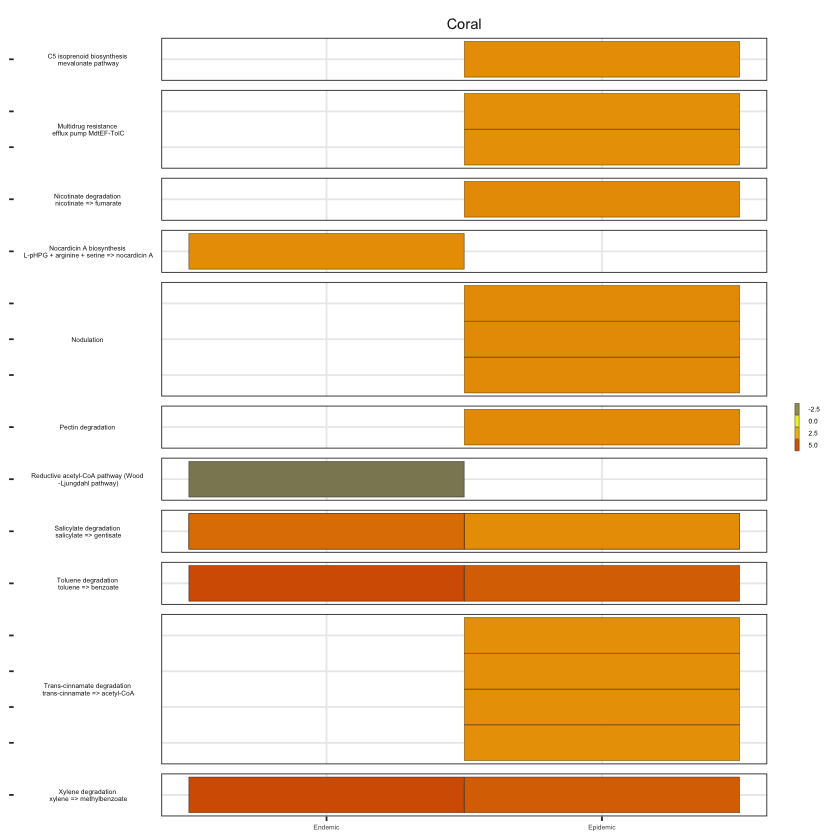

In [28]:
lo = floor(min(desc_coral$coef))
up = ceiling(max(desc_coral$coef))
mid = (lo + up)/2
fig_ko_coral = desc_coral %>%
filter(qval<=0.01) %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = ", ",
    replacement = "\n ")  %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "Wood",
    replacement = "Wood\n ")  %>%
  filter(coef > 3 | coef < -3)  %>% 
  ggplot(aes(x = value, y = gene, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
  scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 5)) +
 theme(axis.text.y = element_blank()) +
 # theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =4)) +
 # theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.2, , keyheight =.50)) +
  theme(legend.text =element_text(size=4)) +
  theme(legend.title = element_text(size=4)) +
  facet_grid(module_name~Type, space ="free", scales="free", switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 3)) +
 theme(strip.text.y = element_text(size = 4))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/KO.png",
     width = 6, height = 6, units = "in", dpi=300)

fig_ko_coral

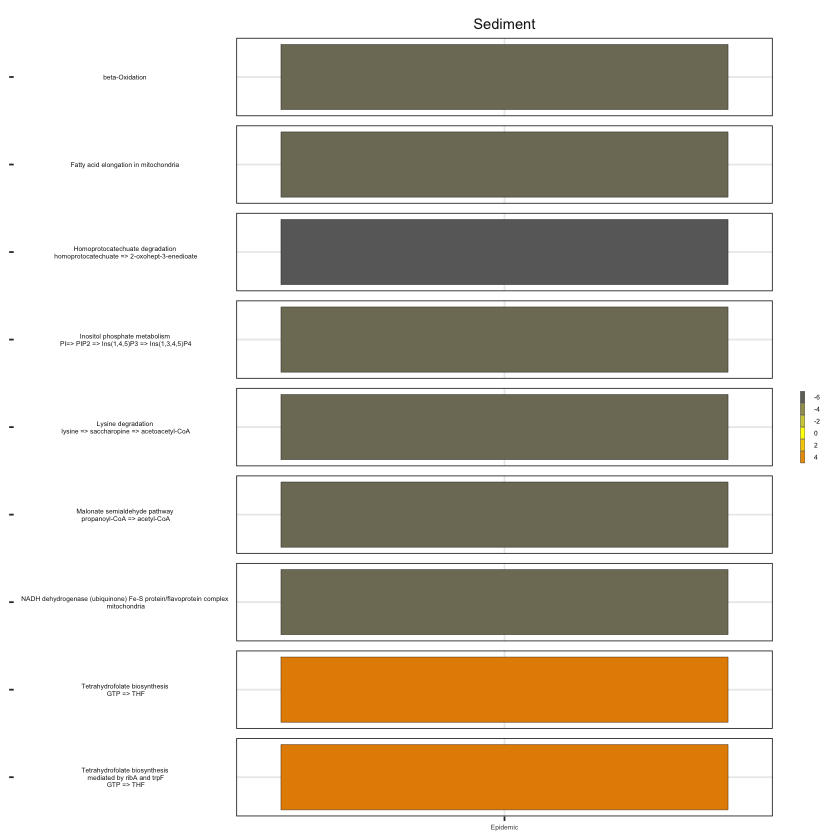

In [29]:
lo = floor(min(desc_sed$coef))
up = ceiling(max(desc_sed$coef))
mid = (lo + up)/2
fig_ko_sed=desc_sed %>%
filter(qval<=0.01) %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = ", ",
    replacement = "\n ")  %>%

  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => 10-membered enediyne core",
    replacement = "")  %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "malonyl-CoA => 3-hydroxyhexadeca-4,6,8,10,12,14-hexaenoyl-ACP => 9-membered enediyne core",
    replacement = "")  %>%
  filter(coef > 3.5 | coef < -5)  %>% 
  ggplot(aes(x = value, y = gene, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
  scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 5)) +
 theme(axis.text.y = element_blank()) +
 # theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =4)) +
 # theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.2, , keyheight =.50)) +
  theme(legend.text =element_text(size=4)) +
  theme(legend.title = element_text(size=4)) +
  facet_grid(module_name~Type, space ="free", scales="free", switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 4)) 

fig_ko_sed
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/KO_sed.png",
     width = 7, height = 7, units = "in", dpi=300)

<ggproto object: Class FacetGrid, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetGrid, Facet, gg>

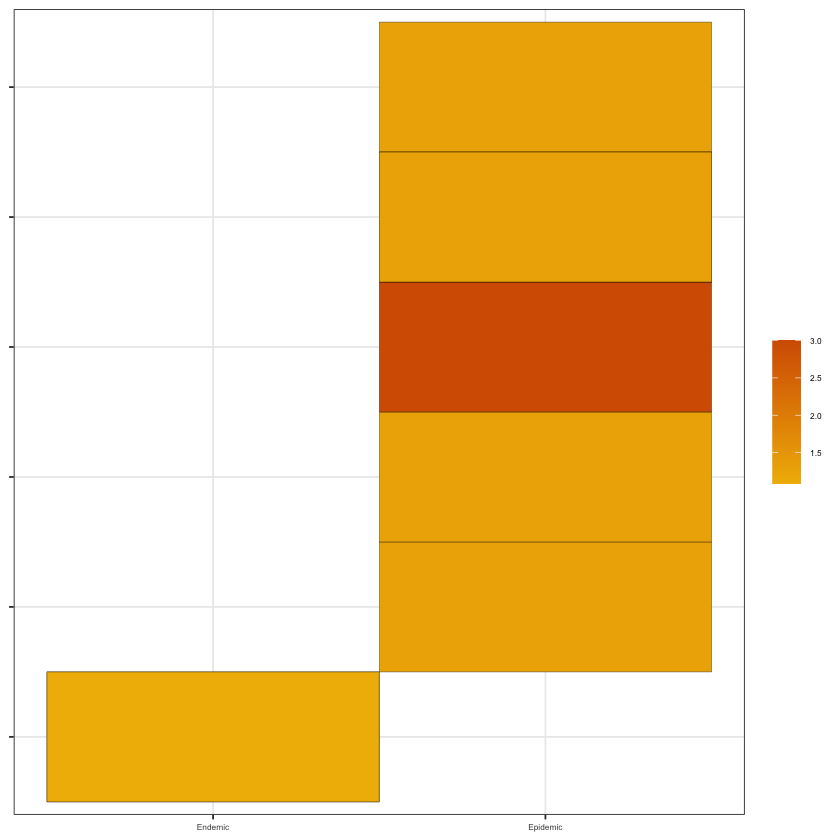

In [30]:
lo = floor(min(desc_wat$coef))
up = ceiling(max(desc_wat$coef))
mid = (lo + up)/2
fig_ko_wat=desc_wat %>%
filter(qval<=0.01) %>%
 mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = ",",
    replacement = "\n")  %>%
  filter(coef > 1 | coef < -1)  %>% 
  ggplot(aes(x = value, y = gene, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
  scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 4)) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 5)) +
 theme(axis.text.y = element_blank()) +
 # theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =5)) +
 # theme(strip.text.y = element_blank()) +
  #guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
  theme(legend.text =element_text(size=5)) +
  theme(legend.title = element_text(size=5)) +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 4)) 
  facet_grid(module_name~Type, space ="free", scales="free", switch="y") 
fig_ko_wat
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/KO_wat.png",
     width = 7, height = 5, units = "in", dpi=300)

## Metacyc

In [31]:
Meta_AH= read.table("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_AH_fill_pipline/pathways_out/path_abun_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1) 
rownames(Meta_AH) <- gsub("-", "_", rownames(Meta_AH))

head(Meta_AH)
dim(Meta_AH)

Meta_wat= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_wat_fill_pipline//pathways_out/path_abun_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)

rownames(Meta_wat) <- gsub("-", "_", rownames(Meta_wat))

head(Meta_wat)
dim(Meta_wat)


Meta_sed= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_sed_fill_pipline/pathways_out/path_abun_unstrat.tsv",
               sep="\t", header=TRUE, row.names=1)

rownames(Meta_sed) <- gsub("-", "_", rownames(Meta_sed))

head(Meta_sed)
dim(Meta_sed)

,R3S7A1,R3S7A2,R3S7A3,R3S7A4,R3S7A5,R3S7C1,R3S7C2,R3S7C3,R3S7C4,R3S7C5,⋯,CG.DSTO3.H,CG.DSTO4.H,CG.DSTO5.H,CG.DSTO6.H,CG.SINT1.H,CG.SINT2.H,CG.SINT3.H,CG.SINT4.H,CG.SINT5.H,CG.SINT6.H
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1CMET2_PWY,12024.345,10802.345,18092.43663,22035.589,27561.74588,33300.43467,33389.5643,39749.22193,26590.07678,27712.6661,⋯,74865.14,67489.46,184988.3614,44535.72874,92307.85426,98908.59434,58233.29330,41095.61840,107323.17344,114562.5993
3_HYDROXYPHENYLACETATE_DEGRADATION_PWY,0.000,0.000,46.95459,0.000,29.87462,113.50150,196.9189,66.02246,216.81944,196.2294,⋯,0.00,0.00,322.8818,27.89939,62.21698,59.51666,14.93472,32.83935,69.32628,181.2521
ALL_CHORISMATE_PWY,0.000,0.000,0.00000,0.000,0.00000,15.57994,0.0000,0.00000,15.56604,0.0000,⋯,0.00,0.00,763.3902,475.52504,83.05481,150.33967,62.26362,87.97449,1170.30946,608.0291
ANAEROFRUCAT_PWY,8389.824,4585.943,10609.30191,10762.535,14755.03092,17933.38927,17854.2187,22027.87814,16477.73341,15055.9349,⋯,25418.28,16609.77,92623.0003,18342.84424,60805.33133,62859.72989,43175.99938,15792.87467,50237.45939,67780.2140
ANAGLYCOLYSIS_PWY,12223.803,11141.396,19881.44290,22426.913,29584.57335,35275.14306,37060.6063,44628.24106,29443.86875,30323.0417,⋯,81739.84,67552.01,204957.9378,50431.66002,103877.65073,99467.56168,72606.83169,57420.41241,115013.10560,126264.3797
ARG+POLYAMINE_SYN,3888.111,2618.525,7248.14265,4670.214,8137.25283,11197.57810,11146.9763,5622.87480,10256.49084,11752.4949,⋯,38410.46,26774.72,85443.2627,23563.68751,44538.34428,36559.17855,17566.19244,11039.59988,36271.59918,51441.3684


[1] 398 117

,R3.1.W,R3.10.W,R3.11.W,R3.12.W,R3.13.W,R3.14.W,R3.15.W,R3.16.W,R3.17.W,R3.18.W,⋯,XP.En9.W,CG.En11.W,CG.En12.W,CG.En2.W,CG.En3.W,CG.En4.W,CG.En5.W,CG.En7.W,CG.En8.W,CG.En9.W
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1CMET2_PWY,47660.8968,44912.9617,40239.845,41150.3946,44106.577,41435.3205,41213.3256,42871.189,38576.0492,42182.7253,⋯,99849.0209,166753.6172,56180.8837,81640.2247,48758.40655,86350.64197,64941.24388,176915.7334,93384.3228,50528.54995
3_HYDROXYPHENYLACETATE_DEGRADATION_PWY,448.0945,919.8462,1064.215,790.9894,1113.726,887.2647,969.7212,1032.812,785.7546,845.2867,⋯,190.6124,217.9039,119.6584,108.0163,83.50869,15.56839,89.93327,282.8353,146.7186,65.38562
AEROBACTINSYN_PWY,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000,⋯,0.0000,12.0000,3.0000,8.0000,0.00000,0.00000,2.00000,20.0000,13.0000,3.00000
ALL_CHORISMATE_PWY,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.000,0.0000,0.0000,⋯,284.5873,2367.3563,680.7739,818.5958,88.10443,1501.38671,1235.50085,935.3302,412.5705,15.59212
ANAEROFRUCAT_PWY,23577.7525,24927.9364,23361.431,24156.0583,26588.090,24105.0844,23497.3423,25629.165,22477.8524,23307.4961,⋯,50522.1433,100816.2051,31665.0395,49328.6990,30073.44442,42478.85512,37654.52969,107631.8090,57274.6788,27902.04521
ANAGLYCOLYSIS_PWY,41865.4934,41667.4857,38077.505,39329.2962,42035.631,39352.3309,39444.0161,41993.714,37356.4775,39038.2606,⋯,99969.8629,184250.1065,61223.2880,88639.1114,54060.13205,89622.25764,73488.68838,194777.2056,103726.8287,57121.27203


[1] 393  96

,R3.1.S,R3.10.S,R3.11.S,R3.12.S,R3.13.S,R3.14.S,R3.15.S,R3.16.S,R3.17.S,R3.18.S,⋯,XP.En1.S,XP.En10.S,XP.En12.S,XP.En2.S,XP.En3.S,XP.En5.S,XP.En6.S,XP.En7.S,XP.En8.S,XP.En9.S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1CMET2_PWY,28758.90407,28464.78887,30111.30130,32178.7964,30129.18723,34411.60977,28663.03659,33716.14002,27148.19707,31479.08715,⋯,38638.03183,34762.29596,54294.6899,29052.70710,53456.0683,51301.56856,64926.3288,68841.5582,33027.56239,57775.3332
3_HYDROXYPHENYLACETATE_DEGRADATION_PWY,33.01609,40.39474,48.59001,106.0514,96.52226,62.67222,42.48146,48.47795,69.87862,41.59452,⋯,72.66006,24.36997,64.0871,49.44051,28.7132,94.65619,173.1912,135.9174,36.61643,129.5409
AEROBACTINSYN_PWY,21.00000,47.00000,40.00000,18.5000,26.50000,58.98750,18.00000,36.50000,13.00000,32.00000,⋯,165.50000,76.00000,145.0000,57.00000,165.5000,187.00000,103.5000,178.8055,28.00000,116.0000
ALL_CHORISMATE_PWY,2419.79376,1606.55839,1565.59710,1705.4053,1126.66175,1185.23969,1722.72713,1625.14535,1237.51211,1354.65700,⋯,1567.95893,1814.43848,1621.9168,1372.77400,2947.4915,2452.21557,4004.0568,3331.4047,1404.19807,2036.3648
ANAEROFRUCAT_PWY,19685.10332,18052.68212,20852.85168,23405.8518,23236.47711,23589.83573,21017.31897,24927.43385,19754.69404,21082.92006,⋯,24933.78742,22591.88220,33476.6325,18498.91134,33290.7496,34473.82873,44681.6624,44521.1883,21263.29973,39526.7503
ANAGLYCOLYSIS_PWY,33134.35078,32959.11662,35140.43710,37357.4378,35793.28883,39579.90090,33468.07402,39614.41725,31269.49828,36700.75621,⋯,45683.82435,40779.44554,63393.5976,33460.51914,63126.7829,60236.17923,76454.5711,79651.1926,38765.48900,68386.7861


[1] 404  90

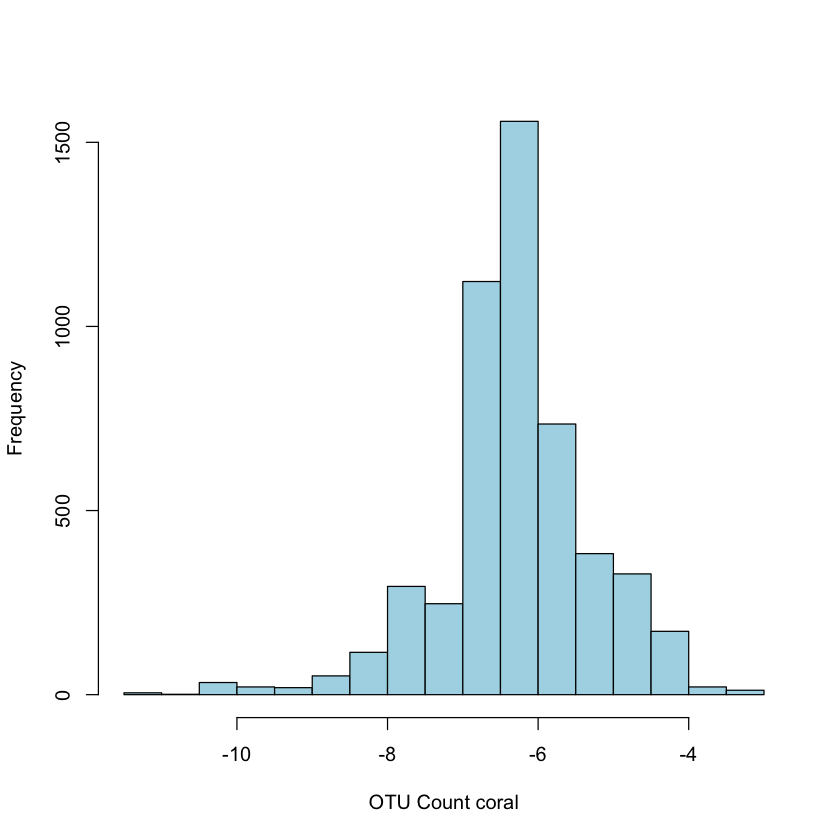

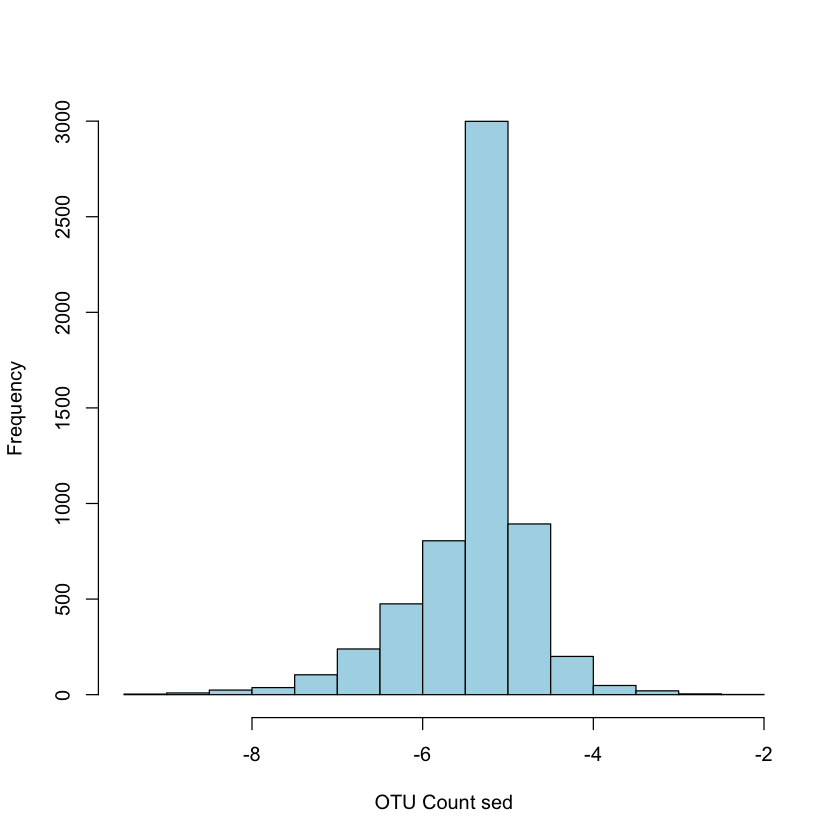

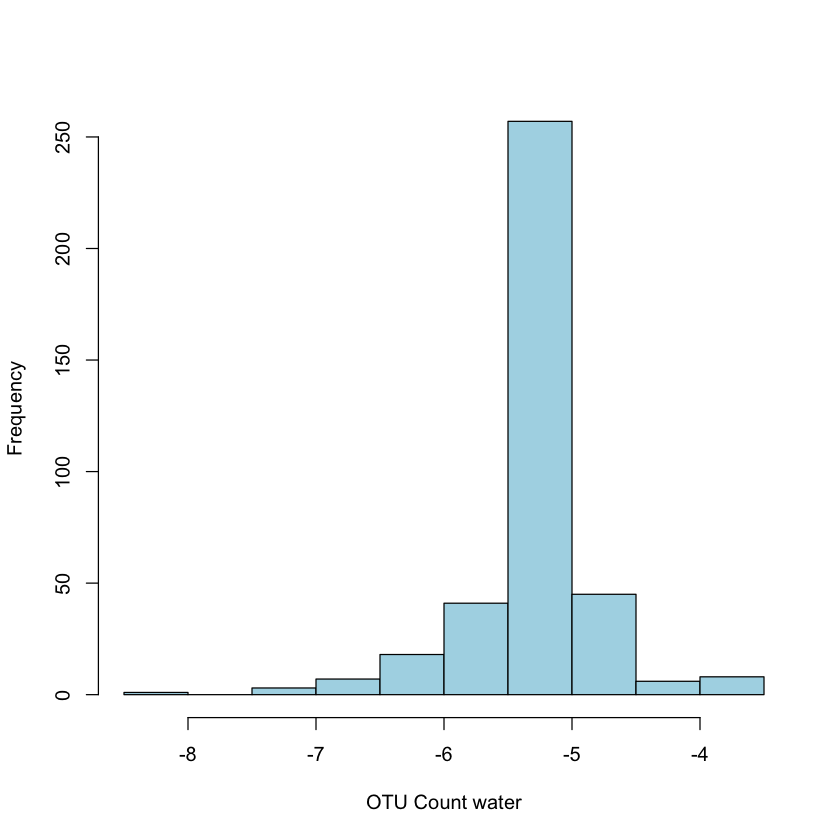

In [32]:
Meta_AH_ra <- t(apply(Meta_AH, 1, function(x) x/sum(x)))
hist(log(KO_AH_ra[,1]), xlab = "OTU Count coral", main = "", col = "lightblue")

Meta_sed_ra <- t(apply(Meta_sed, 1, function(x) x/sum(x)))
hist(log(KO_sed_ra[,1]), xlab = "OTU Count sed", main = "", col = "lightblue")                     

Meta_wat_ra <- t(apply(Meta_wat, 1, function(x) x/sum(x)))
 hist(log(Meta_sed_ra[,1]), xlab = "OTU Count water", main = "", col = "lightblue")                                          

In [33]:
fit_data_coral_cyc = Maaslin2(
    input_data = Meta_AH_ra, 
    input_metadata = meta_fill,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))

2024-09-19 09:58:29.804131 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water//maaslin2.log"
2024-09-19 09:58:29.809529 INFO::Writing function arguments to log file
2024-09-19 09:58:29.81409 INFO::Verifying options selected are valid
2024-09-19 09:58:29.814754 INFO::Determining format of input files
2024-09-19 09:58:29.815331 INFO::Input format is data samples as columns and metadata samples as rows
2024-09-19 09:58:29.825318 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-09-19 09:58:29.826223 INFO::Formula for fixed effects: expr ~  Site.Status
2024-09-19 09:58:29.827024 INFO::Filter data based on min abundance and min prevalence
2024-09-19 09:58:29.82752 INFO::Total samples in data: 117
2024-09-19 09:58:29.827977 INFO::Min samples required with min abundance for a feature not to be filtered: 11.700000
2024-09-19 09:58:29.834898 INFO::Total f

In [34]:
fit_data_wat_cyc = Maaslin2(
    input_data = Meta_wat_ra, 
    input_metadata = meta_fill_w,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-09-19 09:58:43.955453 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water//maaslin2.log"
2024-09-19 09:58:43.960825 INFO::Writing function arguments to log file
2024-09-19 09:58:43.964953 INFO::Verifying options selected are valid
2024-09-19 09:58:43.965603 INFO::Determining format of input files
2024-09-19 09:58:43.966106 INFO::Input format is data samples as columns and metadata samples as rows
2024-09-19 09:58:43.974964 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-09-19 09:58:43.975578 INFO::Formula for fixed effects: expr ~  Site.Status
2024-09-19 09:58:43.976218 INFO::Filter data based on min abundance and min prevalence
2024-09-19 09:58:43.97667 INFO::Total samples in data: 96
2024-09-19 09:58:43.977099 INFO::Min samples required with min abundance for a feature not to be filtered: 9.600000
2024-09-19 09:58:43.981972 INFO::Total fi

In [35]:
fit_data_sed_cyc = Maaslin2(
    input_data = Meta_sed_ra, 
    input_metadata = meta_fill_s,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.01,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))

2024-09-19 09:58:54.921461 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment//maaslin2.log"
2024-09-19 09:58:54.92484 INFO::Writing function arguments to log file
2024-09-19 09:58:54.928738 INFO::Verifying options selected are valid
2024-09-19 09:58:54.929353 INFO::Determining format of input files
2024-09-19 09:58:54.929899 INFO::Input format is data samples as columns and metadata samples as rows
2024-09-19 09:58:54.937526 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-09-19 09:58:54.938405 INFO::Formula for fixed effects: expr ~  Site.Status
2024-09-19 09:58:54.939357 INFO::Filter data based on min abundance and min prevalence
2024-09-19 09:58:54.940149 INFO::Total samples in data: 90
2024-09-19 09:58:54.940677 INFO::Min samples required with min abundance for a feature not to be filtered: 9.000000
2024-09-19 09:58:54.945384 INFO::Total

In [36]:
res_cyc_coral=fit_data_coral_cyc$results
head(res_cyc_coral)
dim(res_cyc_coral)


res_cyc_wat=fit_data_wat_cyc$results
head(res_cyc_wat)
dim(res_cyc_wat)


res_cyc_sed=fit_data_sed_cyc$results
head(res_cyc_sed)
dim(res_cyc_sed)

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,PWY_6071,Site.Status,Epidemic,4.369131,0.6166261,1.297033e-10,Site.StatusEpidemic,5.136251e-08,117,87
2,PWY_6071,Site.Status,Endemic,4.307098,0.6018802,9.104079e-11,Site.StatusEndemic,5.136251e-08,117,87
3,FUCCAT_PWY,Site.Status,Endemic,-2.704921,0.4162912,2.285180e-09,Site.StatusEndemic,6.032875e-07,117,104
4,PWY_6165,Site.Status,Epidemic,3.198153,0.5692185,1.382712e-07,Site.StatusEpidemic,2.737769e-05,117,39
5,P281_PWY,Site.Status,Endemic,2.795725,0.5040010,1.959999e-07,Site.StatusEndemic,3.104638e-05,117,110
6,PWY_6107,Site.Status,Epidemic,3.138380,0.5936813,6.209487e-07,Site.StatusEpidemic,8.196523e-05,117,68


[1] 792  10

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,PWY_6185,Site.Status,Endemic,2.819197,0.4151507,1.115371e-09,Site.StatusEndemic,8.744508e-07,96,38
2,CENTBENZCOA_PWY,Site.Status,Epidemic,1.355088,0.2391025,1.680989e-07,Site.StatusEpidemic,3.294988e-05,96,23
3,P162_PWY,Site.Status,Epidemic,1.337822,0.2357921,1.635628e-07,Site.StatusEpidemic,3.294988e-05,96,23
4,PWY_5177,Site.Status,Epidemic,1.354991,0.2390862,1.681116e-07,Site.StatusEpidemic,3.294988e-05,96,23
5,PWY_6731,Site.Status,Endemic,1.060496,0.1953160,4.483851e-07,Site.StatusEndemic,7.030678e-05,96,14
6,PWY_6185,Site.Status,Epidemic,2.116315,0.4151507,1.856764e-06,Site.StatusEpidemic,2.426172e-04,96,38


[1] 784  10

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,PWY_6641,Site.Status,Epidemic,-1.913847,0.07632375,1.395460e-41,Site.StatusEpidemic,1.127531e-38,90,90
2,PWY_6338,Site.Status,Epidemic,-5.995173,0.23959956,5.709936e-41,Site.StatusEpidemic,1.537876e-38,90,72
3,PWY_7097,Site.Status,Epidemic,-5.995173,0.23959956,5.709936e-41,Site.StatusEpidemic,1.537876e-38,90,72
4,PWY_7098,Site.Status,Epidemic,-5.602469,0.24030675,1.091570e-38,Site.StatusEpidemic,2.204971e-36,90,72
5,P184_PWY,Site.Status,Epidemic,-5.852459,0.25259594,1.725084e-38,Site.StatusEpidemic,2.787735e-36,90,73
6,GALLATE_DEGRADATION_I_PWY,Site.Status,Epidemic,-5.682414,0.26672412,7.659272e-36,Site.StatusEpidemic,8.004106e-34,90,75


[1] 808  10

In [ ]:
#Meta_AH_descrip= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_AH_fill_pipline/pathways_out/path_abun_unstrat_descrip.txt",
 #              sep="\t", header=TRUE, row.names=1
  #                         ) 


In [ ]:
#Meta_AH_descrip= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_AH_fill_pipline/pathways_out/path_abun_unstrat_descrip.txt",
 #              sep="\t", header=TRUE, row.names=1
  #                         ) %>%
#rownames_to_column("feature") 
#select(c("feature", "description")) 
#Meta_AH_descrip$feature <- gsub("-", "_", Meta_AH_descrip$feature)
#head(Meta_AH_descrip)
#dim(Meta_AH_descrip)


#desc_coral_cyc =res_cyc_coral %>%
#left_join(Meta_AH_descrip)
#head(desc_coral_cyc)



#Meta_sed_descrip= read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/picrust2_sed_fill_pipline/pathways_out//path_abun_unstrat.tsv",
 #              sep="\t", header=TRUE, row.names=1)

In [37]:
#https://github.com/ChiLiubio/file2meco/tree/master/data
load("/Users/stephanie.rosales/Downloads/MetaCyc_pathway_map.RData")


In [38]:
MetaCyc_pathway_map=MetaCyc_pathway_map %>%
rownames_to_column("feature") 

MetaCyc_pathway_map$feature <- gsub("-", "_", MetaCyc_pathway_map$feature)
head(MetaCyc_pathway_map)
dim(MetaCyc_pathway_map)

,feature,Superclass1,Superclass2,pathway
,<chr>,<chr>,<chr>,<chr>
1,12DICHLORETHDEG_PWY,Degradation/Utilization/Assimilation,Chlorinated Compound Degradation,"1,2-dichloroethane degradation"
2,14DICHLORBENZDEG_PWY,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,"1,4-dichlorobenzene degradation"
3,1CMET2_PWY,Biosynthesis,"Cofactor, Carrier, and Vitamin Biosynthesis",N10-formyl-tetrahydrofolate biosynthesis
4,2AMINOBENZDEG_PWY,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,anthranilate degradation III (anaerobic)
5,2ASDEG_PWY,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,orthanilate degradation
6,2OXOBUTYRATECAT_PWY,Degradation/Utilization/Assimilation,Carboxylate Degradation,2-oxobutanoate degradation II


[1] 2720    4

In [39]:
df_cyc=res_cyc_coral%>% inner_join(MetaCyc_pathway_map)
head(df_cyc) 


df_cyc_wat= res_cyc_wat%>% inner_join(MetaCyc_pathway_map)
head(df_cyc_wat)


df_cyc_sed= res_cyc_sed%>% inner_join(MetaCyc_pathway_map)
head(df_cyc_sed)

Joining with `by = join_by(feature)`


,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Superclass1,Superclass2,pathway
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,PWY_6071,Site.Status,Epidemic,4.369131,0.6166261,1.297033e-10,Site.StatusEpidemic,5.136251e-08,117,87,Degradation/Utilization/Assimilation,Amine and Polyamine Degradation,superpathway of phenylethylamine degradation
2,PWY_6071,Site.Status,Endemic,4.307098,0.6018802,9.104079e-11,Site.StatusEndemic,5.136251e-08,117,87,Degradation/Utilization/Assimilation,Amine and Polyamine Degradation,superpathway of phenylethylamine degradation
3,FUCCAT_PWY,Site.Status,Endemic,-2.704921,0.4162912,2.285180e-09,Site.StatusEndemic,6.032875e-07,117,104,Degradation/Utilization/Assimilation,Carbohydrate Degradation,fucose degradation
4,PWY_6165,Site.Status,Epidemic,3.198153,0.5692185,1.382712e-07,Site.StatusEpidemic,2.737769e-05,117,39,Biosynthesis,Aromatic Compound Biosynthesis,chorismate biosynthesis II (archaea)
5,P281_PWY,Site.Status,Endemic,2.795725,0.5040010,1.959999e-07,Site.StatusEndemic,3.104638e-05,117,110,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,3-phenylpropanoate degradation
6,PWY_6107,Site.Status,Epidemic,3.138380,0.5936813,6.209487e-07,Site.StatusEpidemic,8.196523e-05,117,68,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,chlorosalicylate degradation


Joining with `by = join_by(feature)`


,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Superclass1,Superclass2,pathway
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,PWY_6185,Site.Status,Endemic,2.819197,0.4151507,1.115371e-09,Site.StatusEndemic,8.744508e-07,96,38,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,4-methylcatechol degradation (ortho cleavage)
2,CENTBENZCOA_PWY,Site.Status,Epidemic,1.355088,0.2391025,1.680989e-07,Site.StatusEpidemic,3.294988e-05,96,23,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,benzoyl-CoA degradation II (anaerobic)
3,P162_PWY,Site.Status,Epidemic,1.337822,0.2357921,1.635628e-07,Site.StatusEpidemic,3.294988e-05,96,23,Degradation/Utilization/Assimilation,Amino Acid Degradation,L-glutamate degradation V (via hydroxyglutarate)
4,PWY_5177,Site.Status,Epidemic,1.354991,0.2390862,1.681116e-07,Site.StatusEpidemic,3.294988e-05,96,23,Degradation/Utilization/Assimilation,Carboxylate Degradation,glutaryl-CoA degradation
5,PWY_6731,Site.Status,Endemic,1.060496,0.1953160,4.483851e-07,Site.StatusEndemic,7.030678e-05,96,14,Degradation/Utilization/Assimilation,Carbohydrate Degradation,starch degradation III
6,PWY_6185,Site.Status,Epidemic,2.116315,0.4151507,1.856764e-06,Site.StatusEpidemic,2.426172e-04,96,38,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,4-methylcatechol degradation (ortho cleavage)


Joining with `by = join_by(feature)`


,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero,Superclass1,Superclass2,pathway
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,PWY_6641,Site.Status,Epidemic,-1.913847,0.07632375,1.395460e-41,Site.StatusEpidemic,1.127531e-38,90,90,Degradation/Utilization/Assimilation,Inorganic Nutrient Metabolism,superpathway of sulfolactate degradation
2,PWY_6338,Site.Status,Epidemic,-5.995173,0.23959956,5.709936e-41,Site.StatusEpidemic,1.537876e-38,90,72,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,superpathway of vanillin and vanillate degradation
3,PWY_7097,Site.Status,Epidemic,-5.995173,0.23959956,5.709936e-41,Site.StatusEpidemic,1.537876e-38,90,72,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,vanillin and vanillate degradation I
4,PWY_7098,Site.Status,Epidemic,-5.602469,0.24030675,1.091570e-38,Site.StatusEpidemic,2.204971e-36,90,72,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,vanillin and vanillate degradation II
5,P184_PWY,Site.Status,Epidemic,-5.852459,0.25259594,1.725084e-38,Site.StatusEpidemic,2.787735e-36,90,73,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,protocatechuate degradation I (meta-cleavage pathway)
6,GALLATE_DEGRADATION_I_PWY,Site.Status,Epidemic,-5.682414,0.26672412,7.659272e-36,Site.StatusEpidemic,8.004106e-34,90,75,Degradation/Utilization/Assimilation,Aromatic Compound Degradation,gallate degradation II


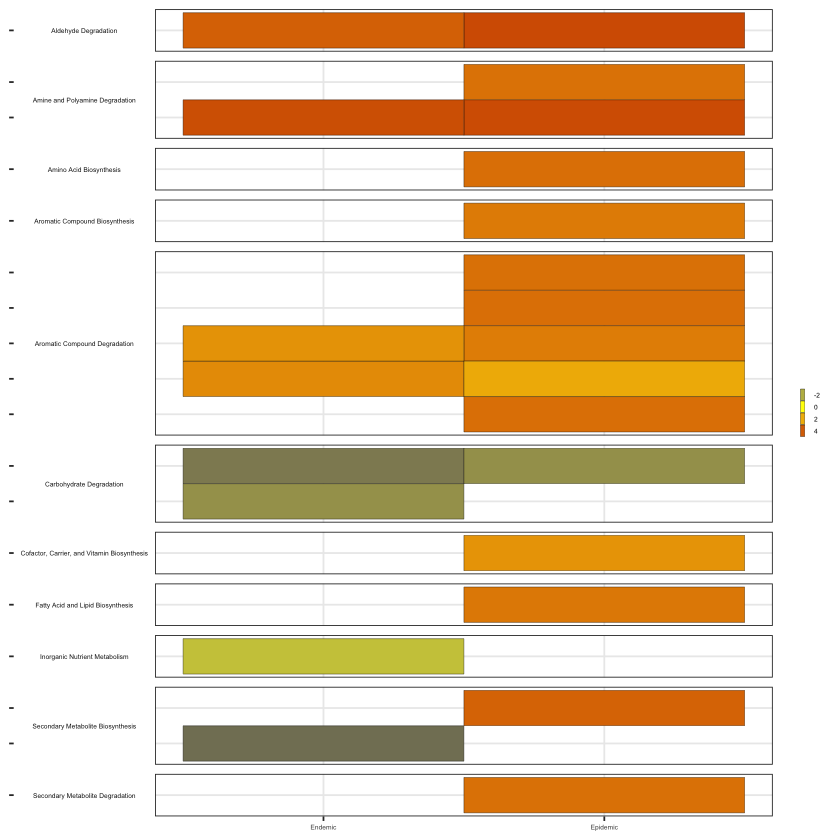

In [40]:
lo = floor(min(df_cyc$coef))
up = ceiling(max(df_cyc$coef))
mid = (lo + up)/2
fig_cyc_coral= df_cyc %>%
filter(qval<=0.01) %>%
 mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
  filter(coef > 1.5 | coef < -1.5)  %>% 
  ggplot(aes(x = value, y = feature, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
  scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 5)) +
 theme(axis.text.y = element_blank()) +
 # theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =4)) +
 # theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.2, , keyheight =.50)) +
  theme(legend.text =element_text(size=4)) +
  theme(legend.title = element_text(size=4)) +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 2.5)) +
 theme(strip.text.y = element_text(size = 4)) +
  facet_grid(Superclass2~., space ="free", scales="free", switch="y") 


fig_cyc_coral
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/metacyc.png",
     width = 5.5, height = 4, units = "in", dpi=300)

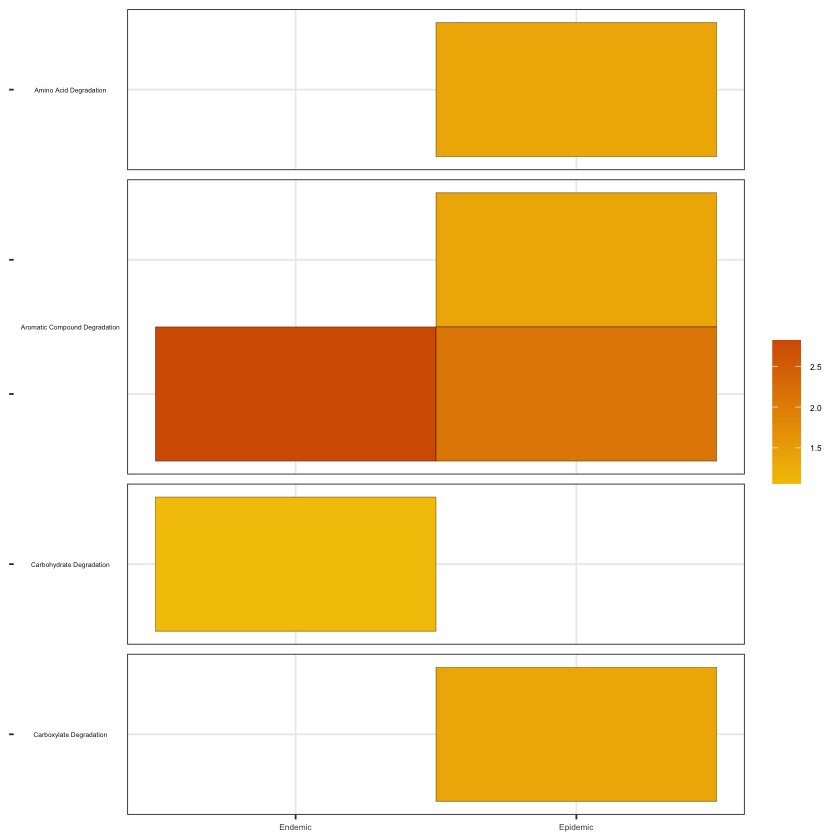

In [41]:
lo = floor(min(df_cyc$coef))
up = ceiling(max(df_cyc$coef))
mid = (lo + up)/2
fig_cyc_wat=df_cyc_wat %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
    filter(qval<=0.01) %>% 
  filter(coef > 1 | coef < -1)  %>% 
  ggplot(aes(x = value, y = pathway, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
   scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
 theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 4)) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 5)) +
 theme(axis.text.y = element_blank()) +
 # theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =5)) +
 # theme(strip.text.y = element_blank()) +
  #guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
  theme(legend.text =element_text(size=5)) +
  theme(legend.title = element_text(size=5)) +
  facet_grid(Superclass2~., space ="free", scales="free", switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 4)) 
fig_cyc_wat
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/metacyc_wat.png",
     width = 5, height = 4, units = "in", dpi=300)

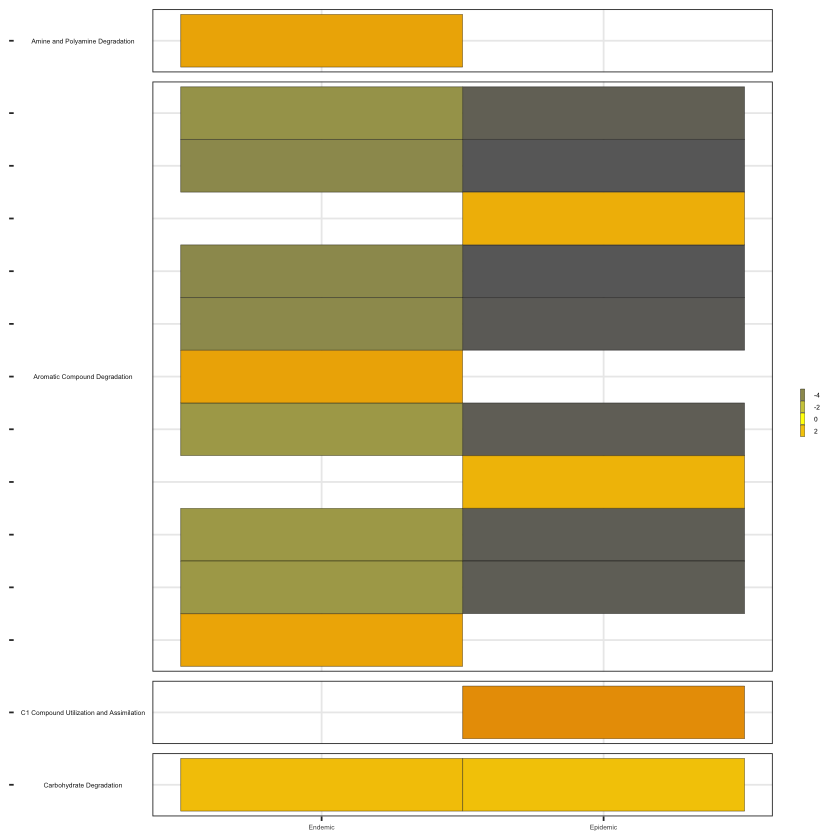

In [42]:
fig_cyc_sed=df_cyc_sed %>%
  mutate_if(
    is.character, 
    stringr::str_replace_all, 
    pattern = "_",
    replacement = " ")  %>%
    filter(qval<=0.01) %>% 
  filter(coef > 2 | coef < -2)  %>% 
  ggplot(aes(x = value, y = pathway, fill = coef)) + 
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "#696969", high = "#D55E00", mid = "Yellow", 
                       na.value = "white", midpoint = mid, 
                       #limit = c(lo, up),
                       name = NULL) +
  #geom_text(aes(coef, feature), size = 2) +
  scale_color_identity() +
  labs(x = NULL, y = NULL, title= NULL) +
  theme_bw() +
  #facet_grid(Order~Type, space ="free", scales="free"
   #          , switch="y") +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(axis.title.x = element_text(size = 5)) +
  theme(axis.title.y = element_text(size = 5)) +
 theme(axis.text.y = element_blank()) +
 # theme(axis.text.y = element_blank()) +
  theme(axis.text.x = element_text(size =4)) +
 # theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.2, , keyheight =.50)) +
  theme(legend.text =element_text(size=4)) +
  theme(legend.title = element_text(size=4)) +
  theme(strip.background = element_blank()) +
  theme(strip.text.y.left = element_text(angle =0 )) +
  theme(strip.text.y = element_text(size = 2.5)) +
 theme(strip.text.y = element_text(size = 4)) +
  facet_grid(Superclass2~., space ="free", scales="free", switch="y")
fig_cyc_sed
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/metacyc_sed.png",
     width = 5, height = 4, units = "in")

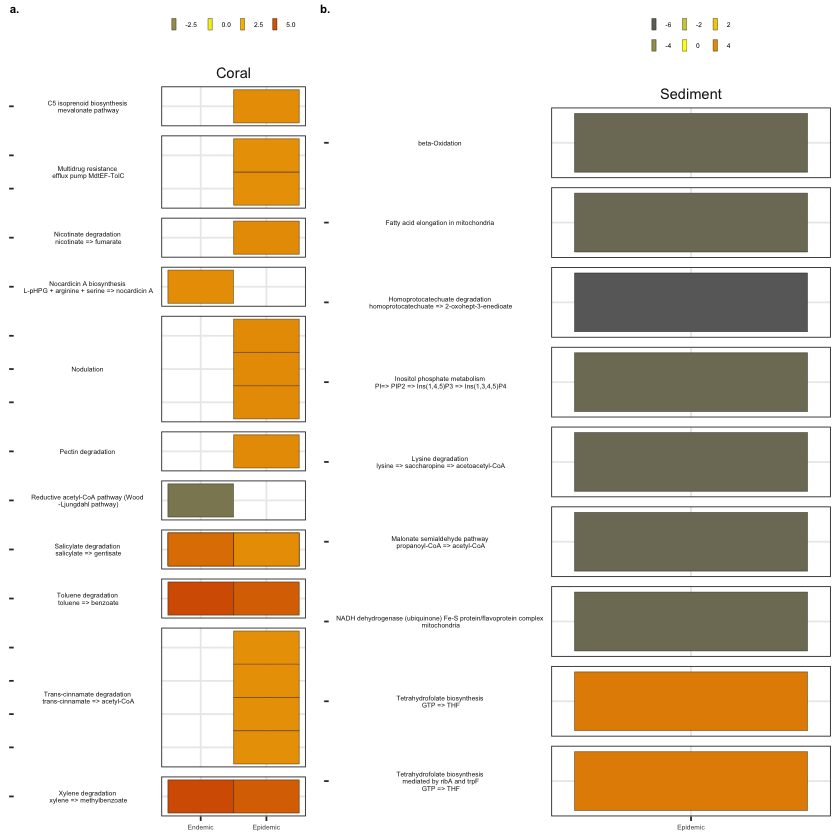

In [43]:
figs_ko=ggarrange(fig_ko_coral, fig_ko_sed, nrow = 1, ncol=2, common.legend = FALSE, legend="top",
                           labels = c(" a.", "b."), widths = c(1.2, 2), font.label = list(size = 7))
figs_ko
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/test.png",
     width = 5.5, height = 6.3, units = "in", dpi=300)

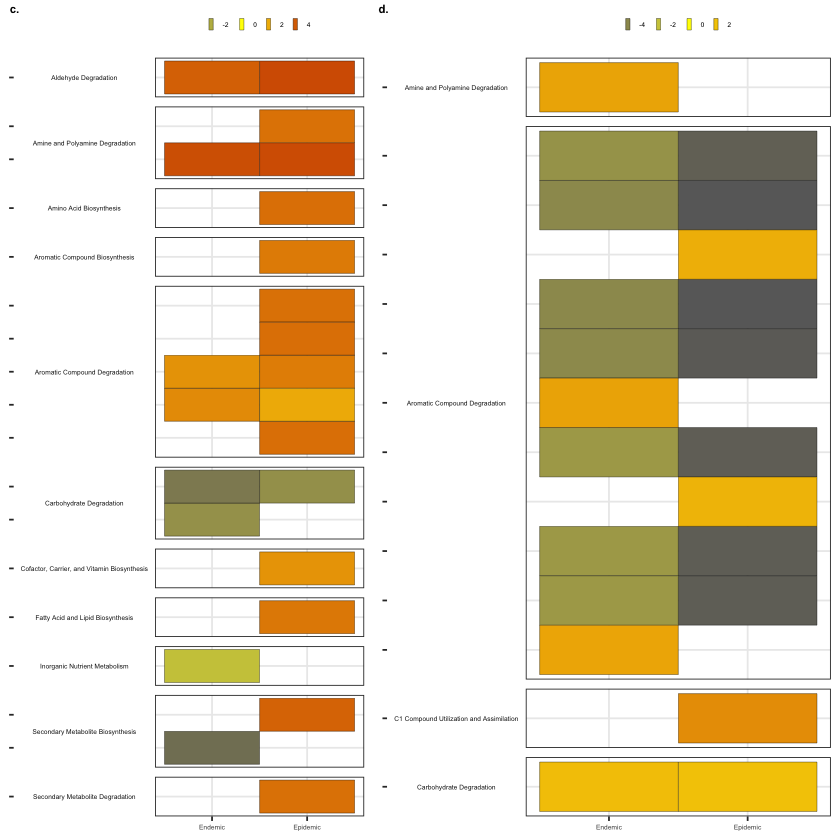

In [44]:
figs_cyc= ggarrange(fig_cyc_coral, fig_cyc_sed, nrow = 1, ncol=2, common.legend = FALSE, legend="top",
                           labels = c(" c.", "d."), widths = c(1.2, 1.5), font.label = list(size = 7))
figs_cyc

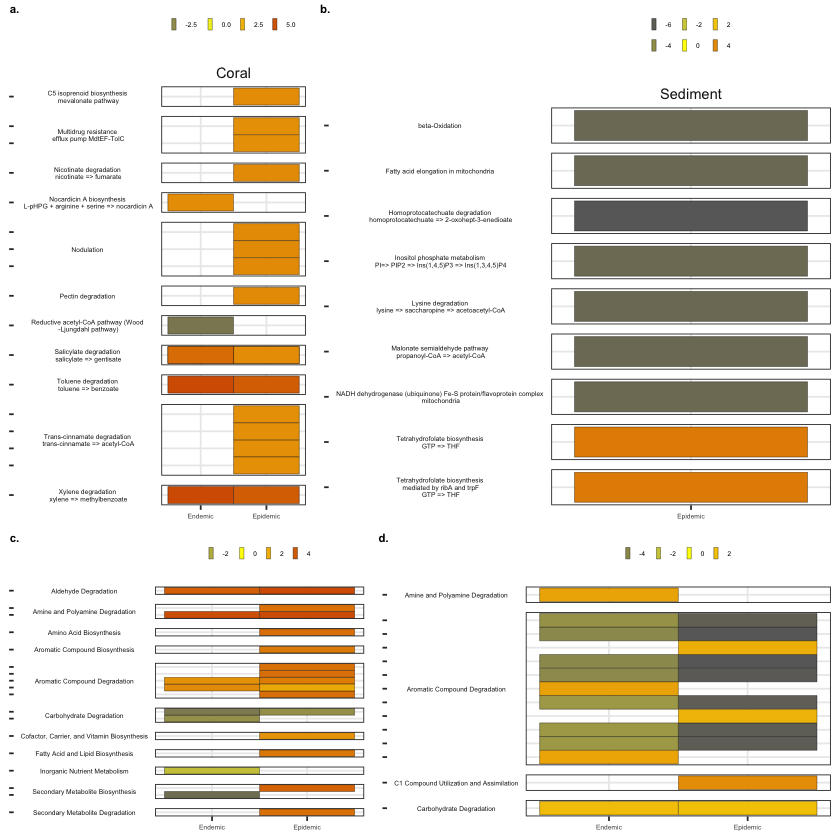

In [45]:
ggarrange(figs_ko, figs_cyc, nrow = 2, common.legend = FALSE, legend="top",
                            heights = c(1.7, 1), 
          
          font.label = list(size = 5))

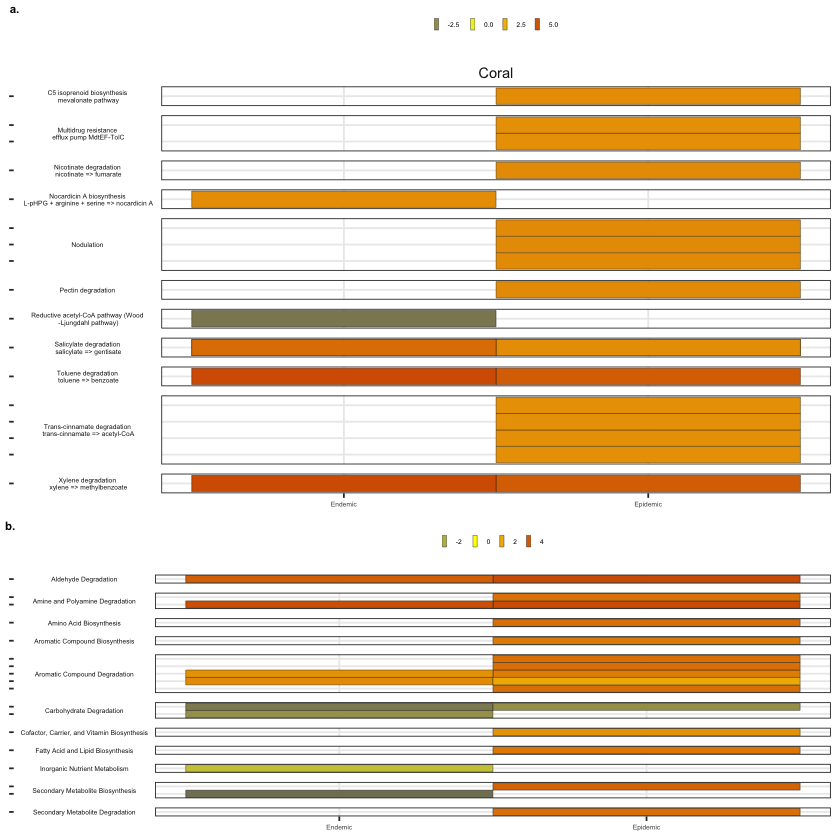

In [46]:
figs_coral =ggarrange(fig_ko_coral, fig_cyc_coral, nrow = 2, common.legend = FALSE, legend="top",
                            heights = c(1.6, 1), labels = c(" a.", "b."),  font.label = list(size = 7))

figs_coral

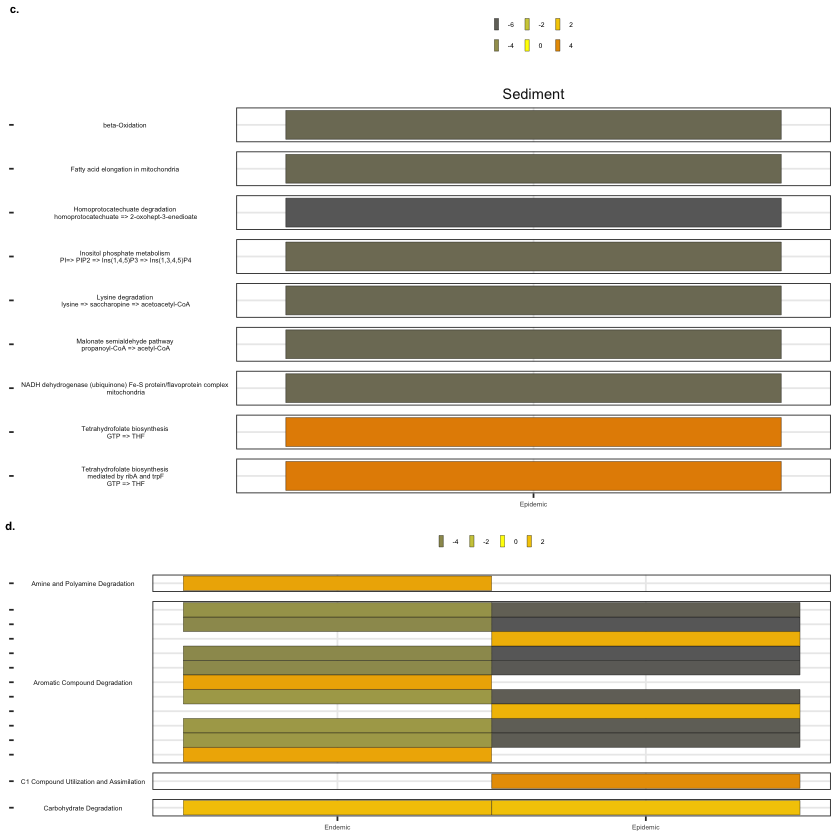

In [47]:
figs_sed= ggarrange(fig_ko_sed, fig_cyc_sed, nrow = 2, common.legend = FALSE, legend="top",
                            heights = c(1.6, 1), labels = c(" c.", "d."),  font.label = list(size = 7))

figs_sed
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/test.png",
     width = 5.5, height = 6.3, units = "in", dpi=300)

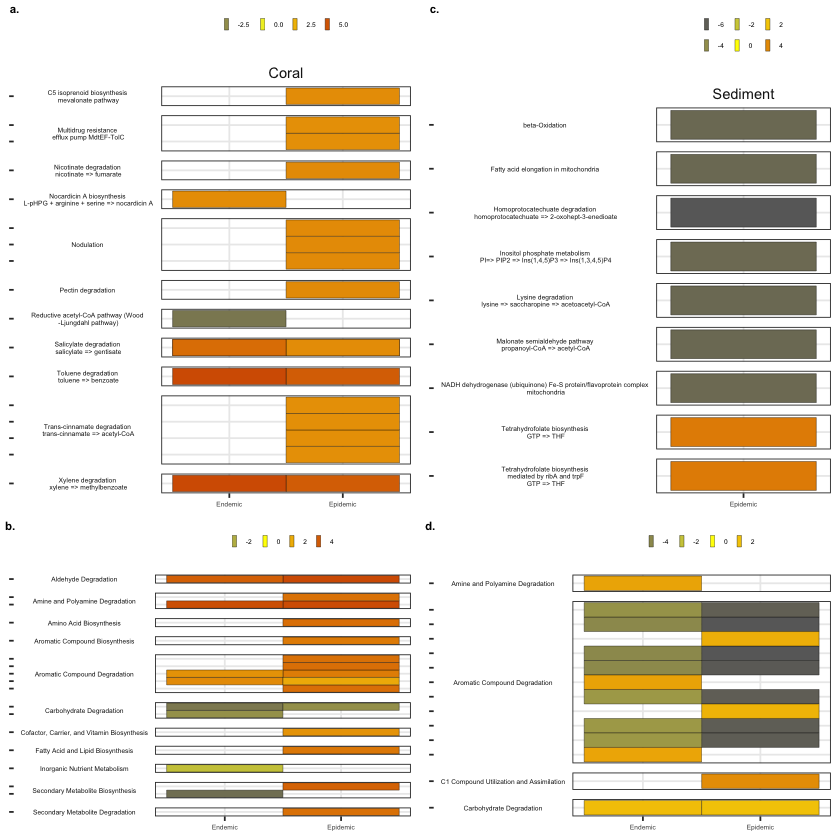

In [49]:
ggarrange(figs_coral, figs_sed, ncol = 2, common.legend = FALSE, legend="top",
                            heights = c(1.8, 1), 
          
          font.label = list(size = 5))

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/Supp_Fig4.png",
     width = 6, height = 6.5, units = "in", dpi=300)